# Preliminaries

What will be covered:

### Day 1
- Why logistic regression? What does it do?
- Modules utilized in building logistic regression models; this will involve
    - Visualization
    - Randomization
    - Pandas
- Quick run-through a toy logistic regression example. 
- Extending the example to realistic data
    - Categorical and numerical variables
- Test and training data
- Cross validation. 
- Exercises

### Day 2
- Theory behind Logistic Regression
- Overfitting, regularization.
- Wide margin classifiers: SVMs.
- Exercises

### Day 3
- Practice and compare logistic regression, SVMs on realistic data sets.
- Mini hackathon.

## Day 1

Some modules that we will cover before launching into Logistic Regression head on. 

Modules:
- Visualization
    - Using matplotlib
    - Using seaborn
- Randomization
    - Using numpy.random
- Pandas 
    - Using dataframes

Quick test:
- We want to generate n (say 100) points in 2D randomly in a bounding box.
- We want to generate n points in 2D colored in _one of two colors_. 

Let's tackle the first of the above tasks.


## Downloads

Good to have:
- IPython
- Jupyter 
- Pycharm (not really required)
- Anaconda
- Download pandas, matplotlib via conda.

## Useful Imports

First, the imports. Declare matplotlib inline so that the plots show in this very notebook.

In [105]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import IPython

print 'IPython version:', IPython.__version__
print 'numpy version:', np.__version__
print 'scikit-learn version:', sk.__version__
print 'matplotlib version:', matplotlib.__version__

IPython version: 4.0.0
numpy version: 1.11.0
scikit-learn version: 0.17.1
matplotlib version: 1.5.1


## Cheat-sheet

Useful modules/methods:
- sklearn
    - linear_model.LogisticRegression
    - linear_model.LogisticRegression.fit
    - linear_model.LogisticRegression.score
    - datasets.make_classification
- numpy (np)
    - ravel
    - vstack
    - reshape
    - random
    - random.uniform
    - random.rand
    - random.randn
    - c_
    - r_ 
    - vectorize
    - Essential reading: http://cs231n.github.io/python-numpy-tutorial/
- matplotlib.pyplot

## Step 1: Plotting

We start off with a barebones example of plotting. If you have IPython, you can type plt.subplots? to get some examples. Let us try out one of the examples there.

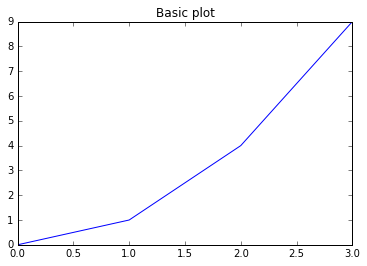

In [217]:
x = [0, 1, 2, 3]
y = [0, 1, 4, 9]
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Basic plot')

Next: 
- Show smoother plots for square, cube.
- Overlay two plots on the same.

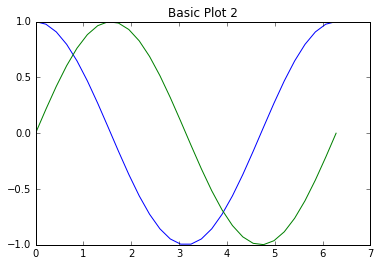

In [218]:
#x = np.linspace(0, 1000, 1000)
#x = range(0, 1000)
x = np.linspace(0, 2*np.pi, 30)
y = np.sin(x)
z = np.cos(x)
f, ax = plt.subplots(1,1)
ax.plot(x, z)
ax.plot(x, y)
ax.set_title("Basic Plot 2")

## Step 2: Adding Randomization

In order to understand aspects of our machine learning algorithm, we would often like to apply it to random datasets. Here, random may mean generated by a distribution. Say, the hypothesis is that some data is generated by the gamma distribution, we would like to generate data according to that distribution and then test our algorithms on that, in order to get a ballpark idea of what we can expect with the actual data. 

Thus, it is important to know how to quickly generate random data. Thus, for instance, we need to know 
- how to quickly generate a sequence of random 2D coordinates
- how to generate a sequence of 0-1 values (these would be the target variables for the random inputs, say).
    - However these two steps together, may not help in generating "random" sets that are roughly separable (for creating instances for classification).
- Thus, need to have means to create more structured instances for classification, which still have randomness in them.

In [219]:
a = random.rand(2, 3)
print a

[[ 0.07672215  0.8871007   0.9013001 ]
 [ 0.55733936  0.12988064  0.41206351]]


In [220]:
b = random.randn(2, 3)
print b

[[ 0.58899438  0.68108014 -0.83625695]
 [-0.93869425  0.4349223  -1.08177197]]


Now, we are going to try generating N (for instance, 100) random 2D points, and color them as in red and yellow, 
then visualize them using matplotlib.

To show the varying effects, perform the following changes. 

Change
- N
- rand to randn 
- colors_used
- also, the color map cmap
- s, i.e. size of the points
- alpha, the shading of the colored points. 

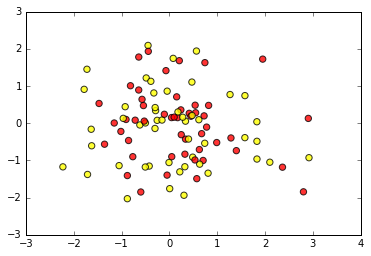

In [221]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)
colors = np.random.rand(N)
colors_used = [2, 3]
colors_used = ['yellow', 'red']
colors = colors_used*(N/len(colors_used))
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y, s = 40, c = colors, alpha = 0.8, cmap='gist_earth')
plt.show()

#### Generating pairs of numbers compactly.

We will use np.vstack for this purpose. 

Warmup:

In [222]:
a = np.array([1,2,3])
b = np.array([4,5,6])
# Try this, see why this doesn't work
# c = np.vstack(a, b)

c = np.vstack([a, b])
# Also, the following works
# c = np.vstack((a, b))

# The following is the list of pairs.
c.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [223]:
coordstest = np.vstack([np.random.uniform(150, 220, 20), 
                        np.random.uniform(150, 220, 20)]).T

#### Creating structured matrices.

In [224]:
individuals = (np.arange(0,200).reshape(-1,1)*np.ones(10).reshape(1,-1)).flatten()
individuals = pd.Series(individuals)
aa = np.arange(0, 200).reshape(-1, 1) # -1 is proxy for 200; has 200 rows and 1 column
bb = np.ones(10).reshape(1,-1) # 1 row, 10 columns
cc = aa*bb
print cc.shape

(200, 10)


In [225]:
corr = -0.95
means = [200, 100]
stds = [10, 20]
covs = [[stds[0]**2, stds[0]*stds[1]*corr],[stds[0]*stds[1]*corr, stds[1]**2]]
print covs

[[100, -190.0], [-190.0, 400]]


In [226]:
coords = np.vstack([np.random.multivariate_normal(coordstest[i,:], covs, 200) 
                         for i in range(10)])

## Step 3: Visualization of data

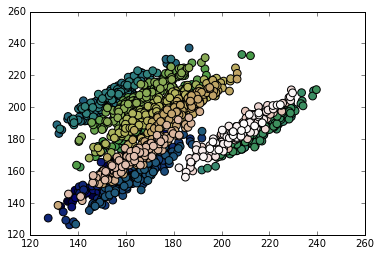

In [227]:
plt.scatter(allCoords['x'], allCoords['y'], c = individuals, 
      s = 60, cmap = 'gist_earth')

## Step 4: Generating datasets. 

### Centering the points
The points from the two classes above seem to be overly mixed. In order to generate samples that are perhaps linearly separable, we will still pick from the normal distribution, but with different means $\mu_1, \mu_2$ and std. deviations $\sigma_1, \sigma_2$.

### Quiz Question:
Given a random variable $Z$ drawn from the *standard normal* distribution (i.e. $Z \sim N(0,1)$), how do we generate a variable that is drawn from $N(\mu, \sigma)$?

#### Hint: 
If $Z \sim N(0, 1)$, then 
* $Z + \mu \sim N(\mu, 1)$.
* $\sigma Z \sim N(0, \sigma)$.



### Centering and coloring the points.
We will keep two colors for now (say, red and yellow), variables $n_r$ and $n_y$ for the number of red and yellow points that we want to keep in our dataset. 

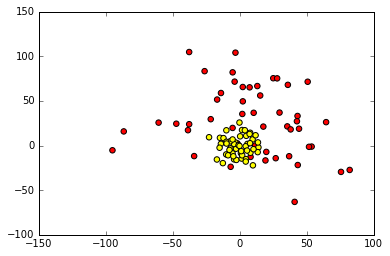

In [228]:
num_pts = [50, 50]
mu_vals = [20, 0]
sigma_vals = [40, 10]

red = 0
yellow = 1
x_r = sigma_vals[red]*np.random.randn(num_pts[red]) + mu_vals[red]
y_r = sigma_vals[red]*np.random.randn(num_pts[red]) + mu_vals[red]

x_y = sigma_vals[yellow]*np.random.randn(num_pts[yellow]) + mu_vals[yellow]
y_y = sigma_vals[yellow]*np.random.randn(num_pts[yellow]) + mu_vals[yellow]
colors = ['red']*num_pts[red] + ['yellow']*num_pts[yellow]

x = np.append(x_r, x_y)
y = np.append(y_r, y_y)

# While x = x_r + x_y would have worked for usual lists, these are numpy arrays, with their own concatenation
# function, np.append.

plt.scatter(x, y, s = 30, c = colors)